# Homework 1, CSE 583

### *Rebeca de Buen Kalman*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(URL, 'fremont.csv')

('fremont.csv', <http.client.HTTPMessage at 0x107e973c8>)

In [5]:
data = pd.read_csv('fremont.csv', index_col = 'Date', parse_dates = True)

In [6]:
data.head()


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


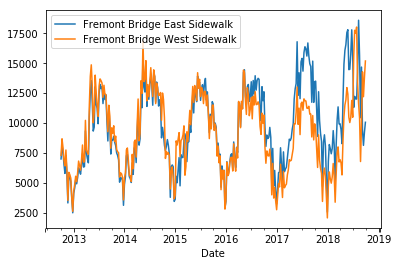

In [7]:
%matplotlib inline
data.resample('W').sum().plot();

In [8]:
plt.style.use('seaborn')
data.columns = ['West', 'East']

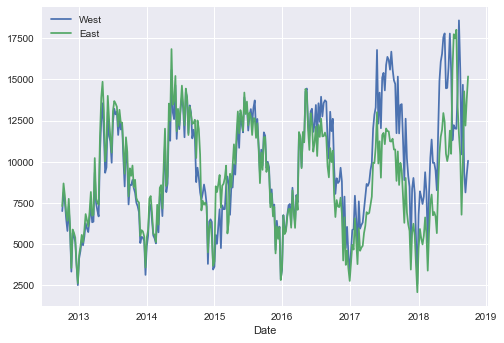

In [9]:
data.resample('w').sum().plot();

(0, 1080850.45)

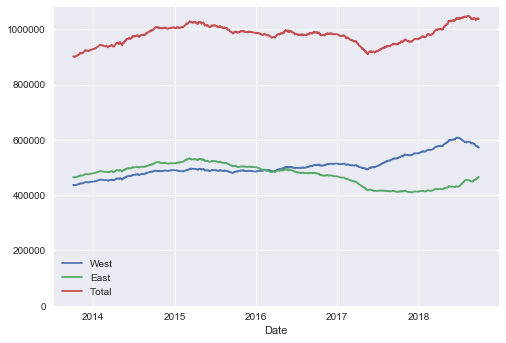

In [10]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None)

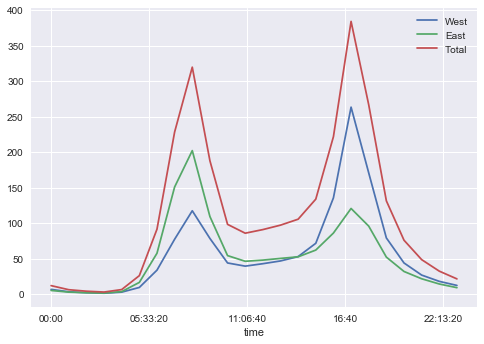

In [11]:
data.groupby(data.index.time).mean().plot();

In [12]:
pivoted = data.pivot_table('Total', index=data.index.time, columns = data.index.date)

In [13]:
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


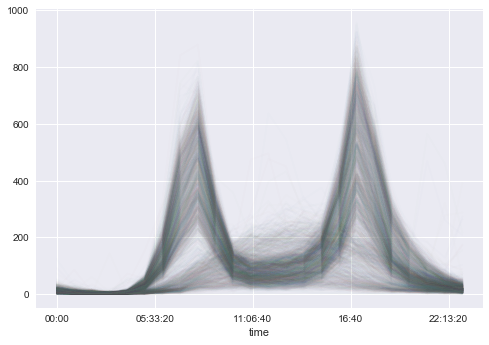

In [14]:
pivoted.plot(legend = False, alpha = 0.01)